In [1]:
import sys
import gensim, logging
import  urllib.request
import  networkx  as nx
import  matplotlib.pyplot  as plt

c:\python\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
words = ["клубника_NOUN", "вишня_NOUN", "малина_NOUN", "черника_NOUN", "голубика_NOUN", "крыжовник_NOUN", "земляника_NOUN", "смородина_NOUN", "виноград_NOUN", "черешня_NOUN"]

In [3]:
urllib.request.urlretrieve("http://rusvectores.org/static/models/rusvectores4/RNC/ruscorpora_upos_skipgram_300_5_2018.vec.gz", "ruscorpora_upos_skipgram_300_5_2018.vec.gz")

('ruscorpora_upos_skipgram_300_5_2018.vec.gz',
 <http.client.HTTPMessage at 0xce560d0>)

In [4]:
m = 'ruscorpora_upos_skipgram_300_5_2018.vec.gz'
if m.endswith('.vec.gz'):
    model = gensim.models.KeyedVectors.load_word2vec_format(m, binary=False)
elif m.endswith('.bin.gz'):
    model = gensim.models.KeyedVectors.load_word2vec_format(m, binary=True)
else:
    model = gensim.models.KeyedVectors.load(m)

In [5]:
model.init_sims(replace=True)

In [6]:
d = {}
for word in words:
    d[word] = []

In [8]:
for  word  in  words:
    idx = words.index(word)
    new_words = words[idx+1:]
    if word in model:
        for new_w in new_words:
            if model.similarity(word, new_w) >= 0.5:
                d[word].append(new_w)

In [10]:
G = nx.Graph()
G.add_nodes_from(d.keys())

In [12]:
for key, val in d.items():
    for v in val:
        G.add_edge(key, v)

In [14]:
deg = nx.degree_centrality(G)
print ("Центральность:")
for nodeid in sorted(deg, key=deg.get, reverse=True):
    print(nodeid)

Центральность:
клубника_NOUN
вишня_NOUN
малина_NOUN
черника_NOUN
голубика_NOUN
крыжовник_NOUN
земляника_NOUN
смородина_NOUN
виноград_NOUN
черешня_NOUN


In [15]:
graphs = list(nx.connected_component_subgraphs(G))
print("Радиус:")
for graph in graphs:
    print(nx.radius(graph))

Радиус:
1


In [16]:
print("Коэффициент кластеризации: ", nx.average_clustering(G))

Коэффициент кластеризации:  1.0


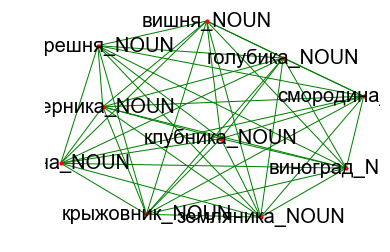

In [17]:
pos=nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos, node_color='red', node_size=10) 
nx.draw_networkx_edges(G, pos, edge_color='green')
nx.draw_networkx_labels(G, pos, font_size=20, font_family='Arial')
plt.axis('off') 
plt.show()